# Proyek Klasifikasi Gambar: flower-classification-5-classes-roselilyetc (kaggle)
- **Nama:** Irfan Nur Fahrudin
- **Email:** irfan.nurfahrudin@gmail.com
- **ID Dicoding:** inurart

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 90.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found exi

In [65]:
import tensorflow as tf
import numpy as np
from google.colab import files
import shutil
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, classification_report
import tensorflowjs as tfjs
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image


In [2]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)
print(tfjs.__version__)

2.19.0
4.22.0


## Data Preparation

### Data Loading

In [3]:
files.upload()  # API kaggle

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"inurart","key":"02e579ba07ddef9231d4fa9401f04e8c"}'}

In [4]:
# Buat folder kaggle di home
os.makedirs("/root/.kaggle", exist_ok=True)

# Pindahkan kaggle.json ke folder yang benar
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permission agar bisa digunakan
os.chmod("/root/.kaggle/kaggle.json", 600)

In [5]:
!kaggle datasets download -d utkarshsaxenadn/flower-classification-5-classes-roselilyetc

Dataset URL: https://www.kaggle.com/datasets/utkarshsaxenadn/flower-classification-5-classes-roselilyetc
License(s): CC0-1.0


In [6]:
# Unzip
with zipfile.ZipFile("/content/flower-classification-5-classes-roselilyetc.zip", 'r') as zip_ref:
    zip_ref.extractall("flower-classification")

In [7]:
# Menghapus file/folder yang tidak digunakan

# Hapus folder secara rekursif
shutil.rmtree('/content/flower-classification/Flower Classification V2/V2/TFRecords', ignore_errors=True)
shutil.rmtree('/content/flower-classification/Flower Classification', ignore_errors=True)

print("Folder berhasil dihapus.")

Folder berhasil dihapus.


In [8]:
# Membaca label kelas pada dataset
print(os.listdir("/content/flower-classification/Flower Classification V2/V2/Training Data"))

['Rose', 'Sunflower', 'Marigold', 'Aster', 'Iris', 'Daisy', 'Lavender', 'Orchid', 'Lily', 'Poppy']


## Gabungkan Data Train, Data Test, Data Validasi ke Direktori yang Sama

In [9]:
# Direktori awal untuk train dan test
train_dir = "/content/flower-classification/Flower Classification V2/V2/Training Data"
test_dir = "/content/flower-classification/Flower Classification V2/V2/Testing Data"
val_dir = "/content/flower-classification/Flower Classification V2/V2/Validation Data"

# Direktori baru untuk dataset gabungan
combined_dir = "/content/flower-classification/combined-dataset"

# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

# Salin file dan folder dari train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari val
for category in os.listdir(val_dir):
    category_dir = os.path.join(val_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

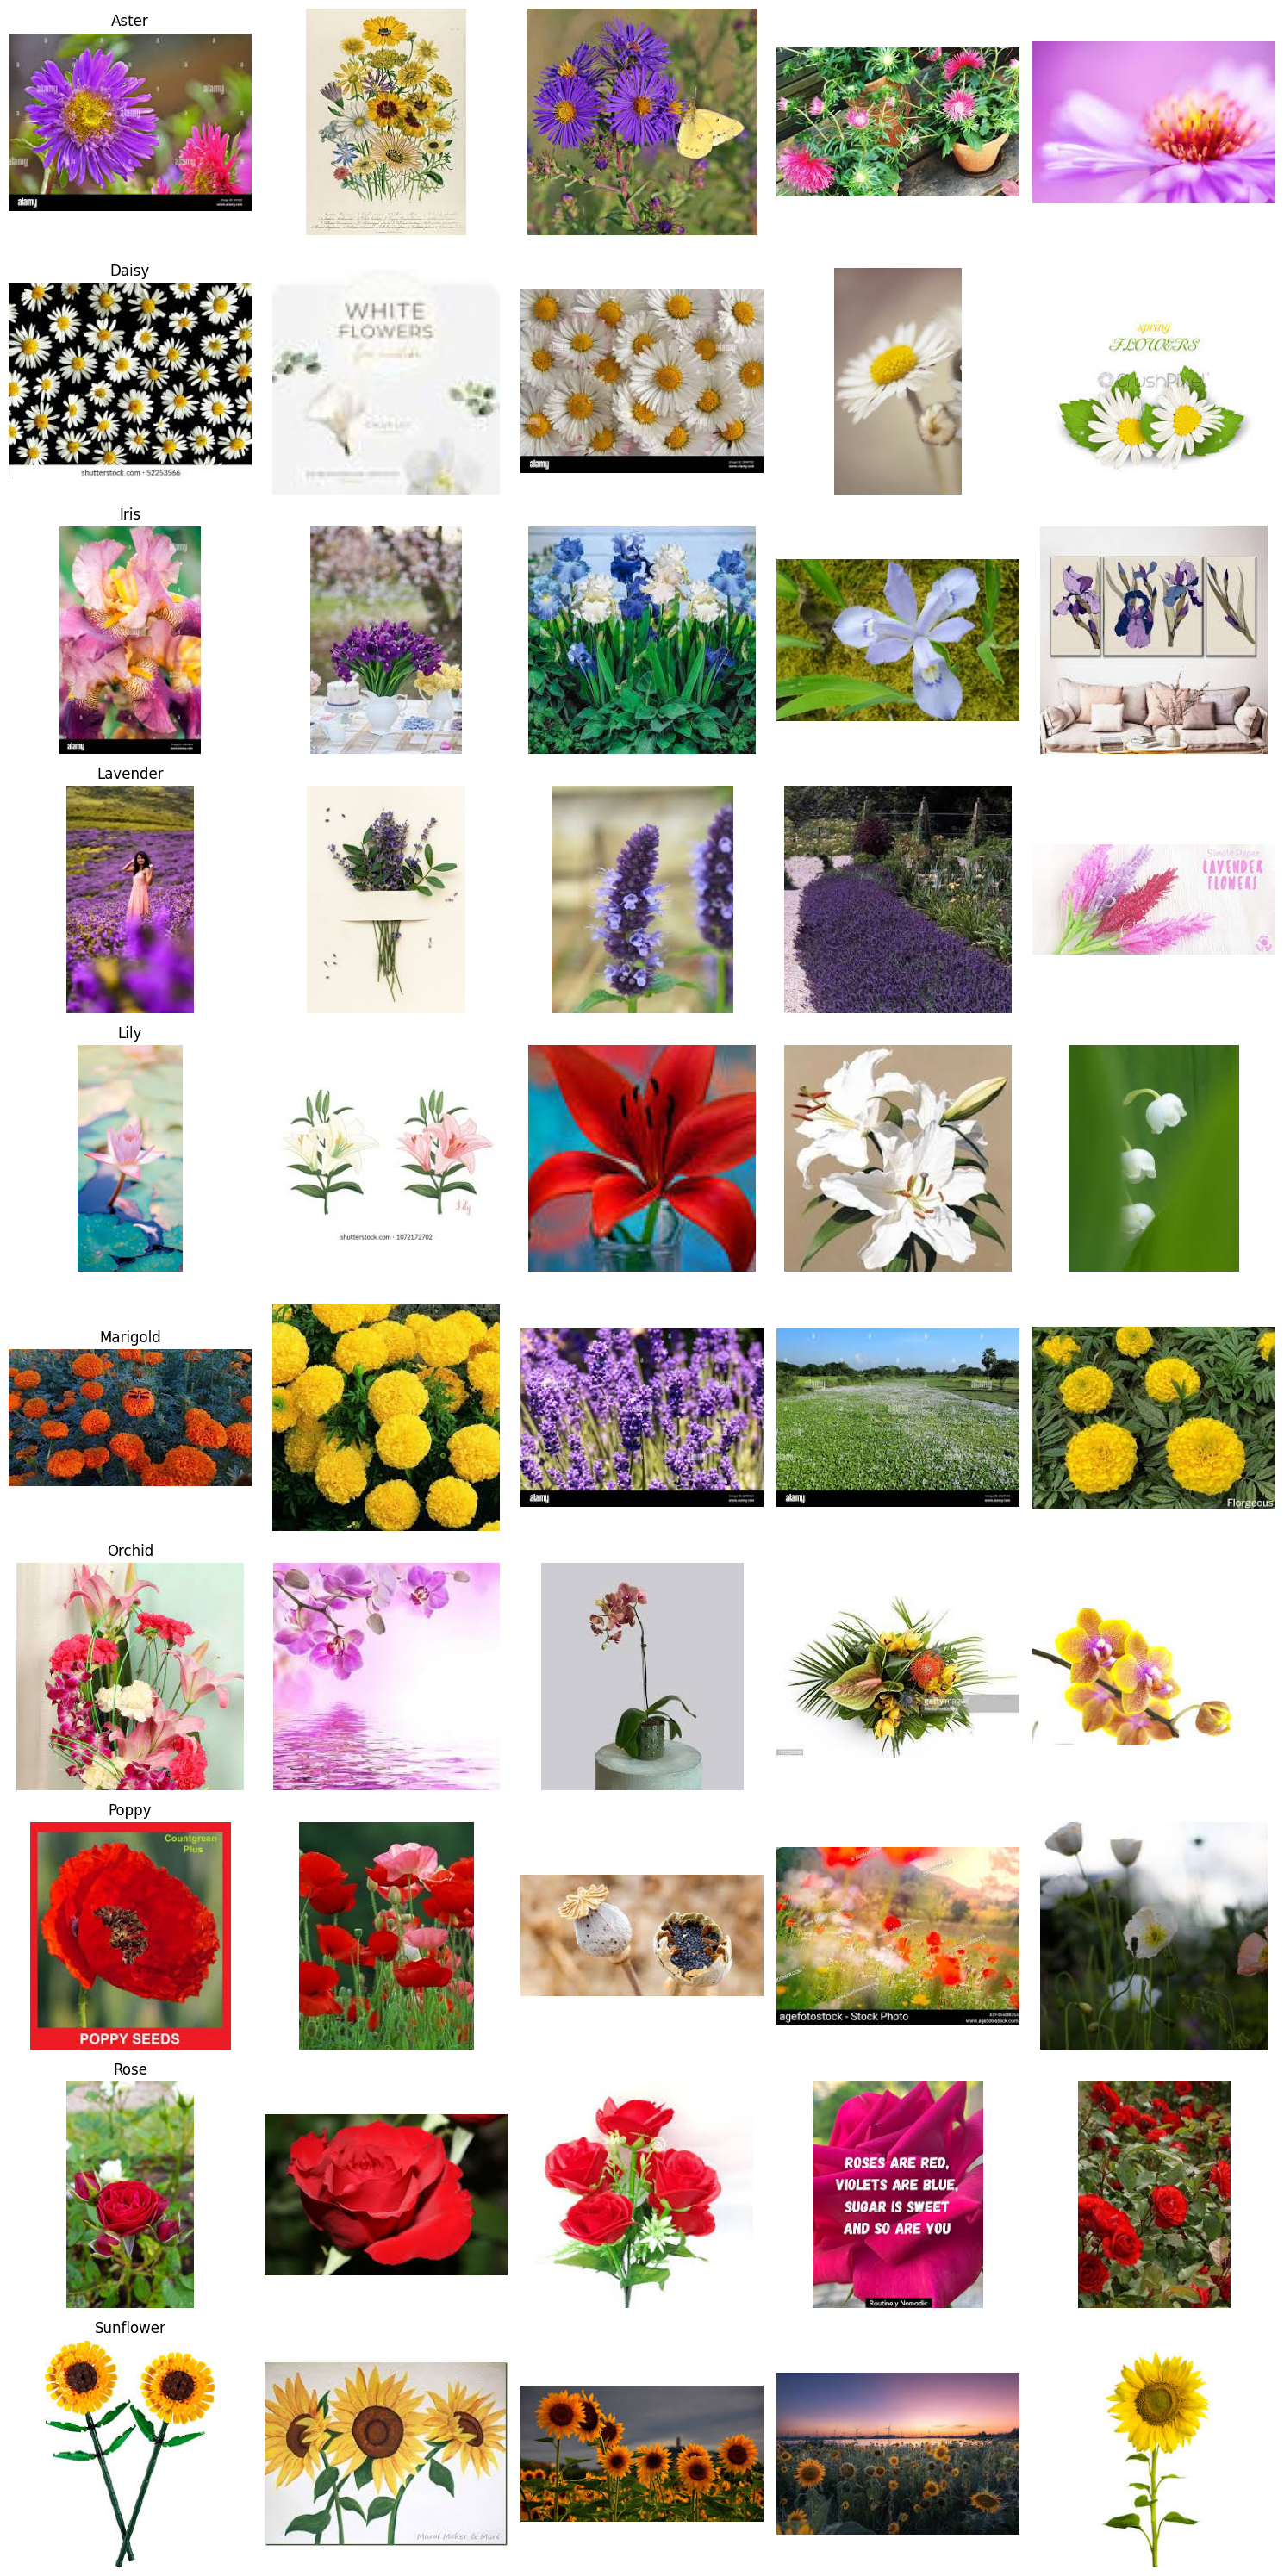

In [10]:
# Ambil sample dataset

dataset_path = "/content/flower-classification/combined-dataset"

# Ambil daftar kelas (folder)
class_names = sorted([f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))])

# Menentukan jumlah kelas
num_classes = len(class_names)

# Membuat subplot dengan jumlah baris = jumlah kelas
fig, axs = plt.subplots(num_classes, 5, figsize=(15, num_classes * 3))

# Loop setiap kelas
for i, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))] # Get only files

    # Pilih 5 gambar secara acak (cek jika jumlah gambar lebih sedikit)
    sample_images = np.random.choice(images, min(5, len(images)), replace=False)

    # Loop untuk menampilkan gambar
    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)  # Buka gambar

        # Tampilkan gambar di subplot
        axs[i, j].imshow(img)
        axs[i, j].axis("off")  # Hilangkan axis
        axs[i, j].set_title(class_name if j == 0 else "")  # Hanya tampilkan nama kelas di gambar pertama

# Sesuaikan tata letak
plt.tight_layout()
plt.show()

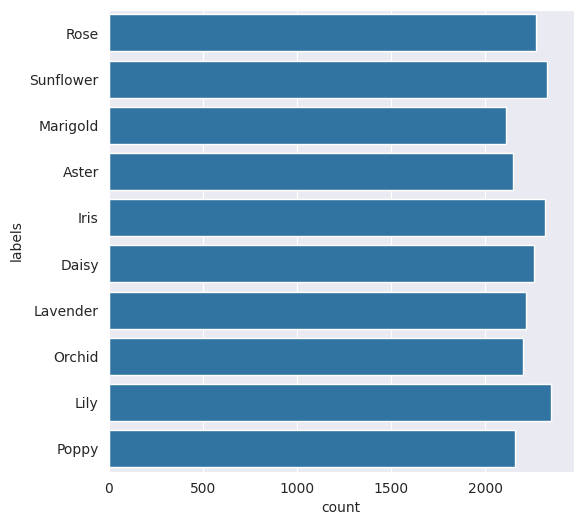

In [11]:
# Distribusi gambar pada dataset

lung_path = "/content/flower-classification/combined-dataset"

# Create a list that stores data for each filenames, filepaths, and labels in the data
file_name = []
labels = []
full_path = []

# Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
for path, subdirs, files in os.walk(lung_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# Plot the distribution of images across the classes
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

Pada hisogram distribusi per kelas sudah mendekati rata, tidak ada perbedaan signifikan. Sehingga data tidak beresiko overfitting.

In [12]:
def print_images_resolution(directory):
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if not os.path.isdir(subdir_path):
            continue

        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        unique_sizes = set()  # Reset unique_sizes untuk setiap subfolder

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            try:
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)
            except Exception as e:
                print(f"Error reading {img_path}: {e}")

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

directory_path = "/content/flower-classification/combined-dataset/"
print('ukuran resolusi dan jumlah data')
print_images_resolution(directory_path)


ukuran resolusi dan jumlah data
Rose: 2269
- (176, 286)
- (178, 283)
- (204, 247)
- (206, 244)
- (205, 246)
- (179, 282)
- (225, 224)
- (188, 269)
- (190, 266)
- (328, 154)
- (170, 297)
- (191, 265)
- (200, 252)
- (202, 249)
- (201, 251)
- (177, 284)
- (203, 248)
- (102, 400)
- (223, 226)
- (221, 229)
- (186, 271)
- (229, 221)
- (187, 270)
- (168, 299)
- (189, 267)
- (276, 183)
- (199, 253)
- (152, 330)
- (254, 198)
- (259, 194)
- (170, 171)
- (185, 272)
- (280, 180)
- (174, 290)
- (266, 190)
- (197, 255)
- (267, 189)
- (175, 289)
- (272, 185)
- (240, 180)
- (257, 196)
- (347, 145)
- (252, 200)
- (258, 195)
- (287, 176)
- (166, 304)
- (247, 204)
- (220, 220)
- (213, 236)
- (278, 182)
- (279, 181)
- (284, 177)
- (173, 291)
- (156, 323)
- (270, 187)
- (158, 318)
- (299, 168)
- (172, 280)
- (256, 197)
- (150, 335)
- (262, 192)
- (164, 306)
- (245, 206)
- (290, 174)
- (209, 241)
- (251, 201)
- (217, 233)
- (163, 308)
- (246, 205)
- (220, 195)
- (157, 322)
- (291, 173)
- (269, 188)
- (94, 4

Dari kode diatas, dataset memiliki resolusi yang beragam

### Data Preprocessing

#### Split Dataset

In [13]:
# Panggil variabel mypath yang menampung folder dataset gambar
mypath= '/content/flower-classification/combined-dataset'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)


# Memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

labels
Aster        2146
Daisy        2260
Iris         2317
Lavender     2217
Lily         2350
Marigold     2108
Orchid       2202
Poppy        2158
Rose         2269
Sunflower    2328
dtype: int64

In [14]:
# Direktori combined dataset
dataset_dir = '/content/flower-classification/combined-dataset'

# Direktori untuk menyimpan dataset yang dibagi
output_dir = '/content/flower-classification/splitted-dataset'
os.makedirs(output_dir, exist_ok=True)

# Persentase pembagian data
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Pastikan rasio pembagian berjumlah 1
assert train_ratio + val_ratio + test_ratio == 1

# Daftar semua subdirektori (kelas)
classes = os.listdir(dataset_dir)

for cls in classes:
    # Path untuk setiap kelas
    class_path = os.path.join(dataset_dir, cls)

    # Dapatkan daftar semua file gambar dalam kelas
    images = os.listdir(class_path)

    # Bagi data menjadi set pelatihan dan set sementara (gabungan validasi dan pengujian)
    train_images, temp_images = train_test_split(images, test_size=(1 - train_ratio), random_state=42)

    # Bagi set sementara menjadi set validasi dan set pengujian
    val_images, test_images = train_test_split(temp_images, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)

    # Buat direktori untuk set pelatihan, validasi, dan pengujian
    train_dir = os.path.join(output_dir, 'train', cls)
    val_dir = os.path.join(output_dir, 'val', cls)
    test_dir = os.path.join(output_dir, 'test', cls)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Salin gambar ke direktori masing-masing
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, img)
        shutil.copyfile(src, dst)

    for img in val_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(val_dir, img)
        shutil.copyfile(src, dst)

    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(test_dir, img)
        shutil.copyfile(src, dst)

print("Dataset berhasil dibagi!")

Dataset berhasil dibagi!


## Modelling

In [15]:
# Inisialisasi parameter
img_size = 224 # size MobileNetV2
batch_size = 32
epochs = 50

# Direktori dataset
train_dir = '/content/flower-classification/splitted-dataset/train'
val_dir = '/content/flower-classification/splitted-dataset/val'
test_dir = '/content/flower-classification/splitted-dataset/test'


# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 15642 images belonging to 10 classes.
Found 3354 images belonging to 10 classes.
Found 3359 images belonging to 10 classes.


### Sequential

In [28]:
# Train dir
train_dir = "/content/flower-classification/splitted-dataset/train"

# Hitung jumlah kategori berdasarkan jumlah folder dalam train_dir
num_classes = len([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

# Learning rate schedule
initial_learning_rate = 0.0005
lr_schedule = ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.8, staircase=True
)

# Load MobileNetV2 sebagai feature extractor
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = True  # Unfreeze beberapa layer terakhir

# Fine-tune hanya layer terakhir dari MobileNetV2
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Membuat model Sequential dengan tambahan Conv2D dan MaxPooling2D
model = Sequential([
    base_model,
    Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=l2(0.0001)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 7, 7, 256)           │       2,949,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 3, 128)           │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,579,274 (21.28 MB)

 Trainable params: 4,846,666 (18.49 MB)

 Non-trainable params: 732,608 (2.79 MB)

In [27]:
del model  # Menghapus model dari memori
tf.keras.backend.clear_session()


In [29]:
# Callback untuk menghentikan training dan validation akurasi mencapai 95%
class StopTrainingAtAccuracy(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        train_acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')

        if train_acc is not None and val_acc is not None:
            if train_acc >= 0.95 and val_acc >= 0.95:  # Cek keduanya
                print(f"\n🎯 Epoch {epoch+1}: Akurasi training & validasi ≥ 95%! 🚀 Training dihentikan.")
                self.model.stop_training = True

# Inisialisasi callback
stop_callback = StopTrainingAtAccuracy()


# ModelCheckpoint untuk menyimpan model terbaik berdasarkan akurasi validasi tertinggi
checkpoint = ModelCheckpoint(
    'best_model.h5', monitor='val_accuracy', mode='max',
    save_best_only=True, verbose=1
)

# Training model dengan callback
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[checkpoint, stop_callback]
)



Epoch 1/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.3248 - loss: 2.3443
Epoch 1: val_accuracy improved from -inf to 0.68426, saving model to best_model.h5


489/489 ━━━━━━━━━━━━━━━━━━━━ 259s 486ms/step - accuracy: 0.3252 - loss: 2.3432 - val_accuracy: 0.6843 - val_loss: 1.1416
Epoch 2/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.6998 - loss: 1.1294
Epoch 2: val_accuracy improved from 0.68426 to 0.78772, saving model to best_model.h5


489/489 ━━━━━━━━━━━━━━━━━━━━ 222s 454ms/step - accuracy: 0.6998 - loss: 1.1293 - val_accuracy: 0.7877 - val_loss: 0.8472
Epoch 3/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.7600 - loss: 0.9363
Epoch 3: val_accuracy improved from 0.78772 to 0.79159, saving model to best_model.h5


489/489 ━━━━━━━━━━━━━━━━━━━━ 224s 458ms/step - accuracy: 0.7600 - loss: 0.9362 - val_accuracy: 0.7916 - val_loss: 0.8333
Epoch 4/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.8029 - loss: 0.8198
Epoch 4: val_accuracy improved from 0.79159 to 0.79934, saving model to best_model.h5


489/489 ━━━━━━━━━━━━━━━━━━━━ 224s 457ms/step - accuracy: 0.8029 - loss: 0.8198 - val_accuracy: 0.7993 - val_loss: 0.9951
Epoch 5/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.8174 - loss: 0.7630
Epoch 5: val_accuracy improved from 0.79934 to 0.82051, saving model to best_model.h5


489/489 ━━━━━━━━━━━━━━━━━━━━ 230s 471ms/step - accuracy: 0.8174 - loss: 0.7630 - val_accuracy: 0.8205 - val_loss: 0.8224
Epoch 6/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8284 - loss: 0.7189
Epoch 6: val_accuracy improved from 0.82051 to 0.83154, saving model to best_model.h5


489/489 ━━━━━━━━━━━━━━━━━━━━ 223s 456ms/step - accuracy: 0.8284 - loss: 0.7188 - val_accuracy: 0.8315 - val_loss: 0.7528
Epoch 7/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.8486 - loss: 0.6715
Epoch 7: val_accuracy did not improve from 0.83154
489/489 ━━━━━━━━━━━━━━━━━━━━ 221s 452ms/step - accuracy: 0.8486 - loss: 0.6715 - val_accuracy: 0.8214 - val_loss: 0.8080
Epoch 8/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.8569 - loss: 0.6172
Epoch 8: val_accuracy improved from 0.83154 to 0.84884, saving model to best_model.h5


489/489 ━━━━━━━━━━━━━━━━━━━━ 220s 450ms/step - accuracy: 0.8568 - loss: 0.6173 - val_accuracy: 0.8488 - val_loss: 0.6886
Epoch 9/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.8622 - loss: 0.6051
Epoch 9: val_accuracy did not improve from 0.84884
489/489 ━━━━━━━━━━━━━━━━━━━━ 220s 450ms/step - accuracy: 0.8622 - loss: 0.6051 - val_accuracy: 0.8378 - val_loss: 0.7831
Epoch 10/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.8705 - loss: 0.5699
Epoch 10: val_accuracy did not improve from 0.84884
489/489 ━━━━━━━━━━━━━━━━━━━━ 228s 466ms/step - accuracy: 0.8705 - loss: 0.5700 - val_accuracy: 0.8304 - val_loss: 0.7693
Epoch 11/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.8701 - loss: 0.5519
Epoch 11: val_accuracy did not improve from 0.84884
489/489 ━━━━━━━━━━━━━━━━━━━━ 220s 450ms/step - accuracy: 0.8701 - loss: 0.5519 - val_accuracy: 0.8402 - val_loss: 0.8050
Epoch 12/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.8775 - loss: 0.5468
Epoch 

489/489 ━━━━━━━━━━━━━━━━━━━━ 221s 451ms/step - accuracy: 0.8775 - loss: 0.5468 - val_accuracy: 0.8515 - val_loss: 0.7828
Epoch 13/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.8849 - loss: 0.5114
Epoch 13: val_accuracy improved from 0.85152 to 0.85957, saving model to best_model.h5


489/489 ━━━━━━━━━━━━━━━━━━━━ 220s 450ms/step - accuracy: 0.8849 - loss: 0.5114 - val_accuracy: 0.8596 - val_loss: 0.7134
Epoch 14/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8908 - loss: 0.4765
Epoch 14: val_accuracy did not improve from 0.85957
489/489 ━━━━━━━━━━━━━━━━━━━━ 217s 443ms/step - accuracy: 0.8908 - loss: 0.4765 - val_accuracy: 0.8315 - val_loss: 0.8725
Epoch 15/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.8865 - loss: 0.4864
Epoch 15: val_accuracy did not improve from 0.85957
489/489 ━━━━━━━━━━━━━━━━━━━━ 212s 433ms/step - accuracy: 0.8865 - loss: 0.4864 - val_accuracy: 0.8476 - val_loss: 0.8092
Epoch 16/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.8992 - loss: 0.4387
Epoch 16: val_accuracy did not improve from 0.85957
489/489 ━━━━━━━━━━━━━━━━━━━━ 212s 434ms/step - accuracy: 0.8992 - loss: 0.4388 - val_accuracy: 0.8533 - val_loss: 0.7706
Epoch 17/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8982 - loss: 0.4431
Epoc

489/489 ━━━━━━━━━━━━━━━━━━━━ 215s 440ms/step - accuracy: 0.8982 - loss: 0.4432 - val_accuracy: 0.8709 - val_loss: 0.6782
Epoch 18/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step - accuracy: 0.9039 - loss: 0.4187
Epoch 18: val_accuracy did not improve from 0.87090
489/489 ━━━━━━━━━━━━━━━━━━━━ 219s 449ms/step - accuracy: 0.9039 - loss: 0.4187 - val_accuracy: 0.8661 - val_loss: 0.6881
Epoch 19/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.9049 - loss: 0.4086
Epoch 19: val_accuracy did not improve from 0.87090
489/489 ━━━━━━━━━━━━━━━━━━━━ 214s 437ms/step - accuracy: 0.9049 - loss: 0.4086 - val_accuracy: 0.8444 - val_loss: 0.7851
Epoch 20/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.9115 - loss: 0.3900
Epoch 20: val_accuracy did not improve from 0.87090
489/489 ━━━━━━━━━━━━━━━━━━━━ 215s 439ms/step - accuracy: 0.9115 - loss: 0.3901 - val_accuracy: 0.8670 - val_loss: 0.6656
Epoch 21/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.9103 - loss: 0.3915
Epoc

489/489 ━━━━━━━━━━━━━━━━━━━━ 217s 445ms/step - accuracy: 0.9231 - loss: 0.3376 - val_accuracy: 0.8757 - val_loss: 0.6260
Epoch 23/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9275 - loss: 0.3232
Epoch 23: val_accuracy did not improve from 0.87567
489/489 ━━━━━━━━━━━━━━━━━━━━ 216s 442ms/step - accuracy: 0.9274 - loss: 0.3233 - val_accuracy: 0.8736 - val_loss: 0.6003
Epoch 24/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.9304 - loss: 0.3064
Epoch 24: val_accuracy did not improve from 0.87567
489/489 ━━━━━━━━━━━━━━━━━━━━ 265s 447ms/step - accuracy: 0.9304 - loss: 0.3064 - val_accuracy: 0.8733 - val_loss: 0.6576
Epoch 25/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9311 - loss: 0.3105
Epoch 25: val_accuracy did not improve from 0.87567
489/489 ━━━━━━━━━━━━━━━━━━━━ 221s 451ms/step - accuracy: 0.9311 - loss: 0.3105 - val_accuracy: 0.8673 - val_loss: 0.6403
Epoch 26/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9316 - loss: 0.2987
Epoc

489/489 ━━━━━━━━━━━━━━━━━━━━ 219s 447ms/step - accuracy: 0.9663 - loss: 0.1527 - val_accuracy: 0.8763 - val_loss: 0.6938
Epoch 47/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9678 - loss: 0.1520
Epoch 47: val_accuracy did not improve from 0.87627
489/489 ━━━━━━━━━━━━━━━━━━━━ 218s 446ms/step - accuracy: 0.9678 - loss: 0.1520 - val_accuracy: 0.8620 - val_loss: 0.7682
Epoch 48/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9728 - loss: 0.1409
Epoch 48: val_accuracy did not improve from 0.87627
489/489 ━━━━━━━━━━━━━━━━━━━━ 220s 450ms/step - accuracy: 0.9728 - loss: 0.1409 - val_accuracy: 0.8745 - val_loss: 0.6876
Epoch 49/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step - accuracy: 0.9709 - loss: 0.1365
Epoch 49: val_accuracy did not improve from 0.87627
489/489 ━━━━━━━━━━━━━━━━━━━━ 221s 451ms/step - accuracy: 0.9709 - loss: 0.1365 - val_accuracy: 0.8736 - val_loss: 0.7058
Epoch 50/50
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9688 - loss: 0.1483
Epoc

489/489 ━━━━━━━━━━━━━━━━━━━━ 220s 449ms/step - accuracy: 0.9688 - loss: 0.1483 - val_accuracy: 0.8804 - val_loss: 0.7201


## Evaluasi dan Visualisasi

In [30]:
test_dir = "/content/flower-classification/splitted-dataset/test"

# Data Augmentation untuk Test Set (hanya rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load dataset test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Jangan shuffle agar sesuai dengan ground truth
)

# Evaluasi Model
test_loss, test_acc = model.evaluate(test_generator)

print(f"🎯 Akurasi Model pada Test Set: {test_acc * 100:.2f}%")


Found 3359 images belonging to 10 classes.
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.8544 - loss: 0.7631
🎯 Akurasi Model pada Test Set: 89.58%


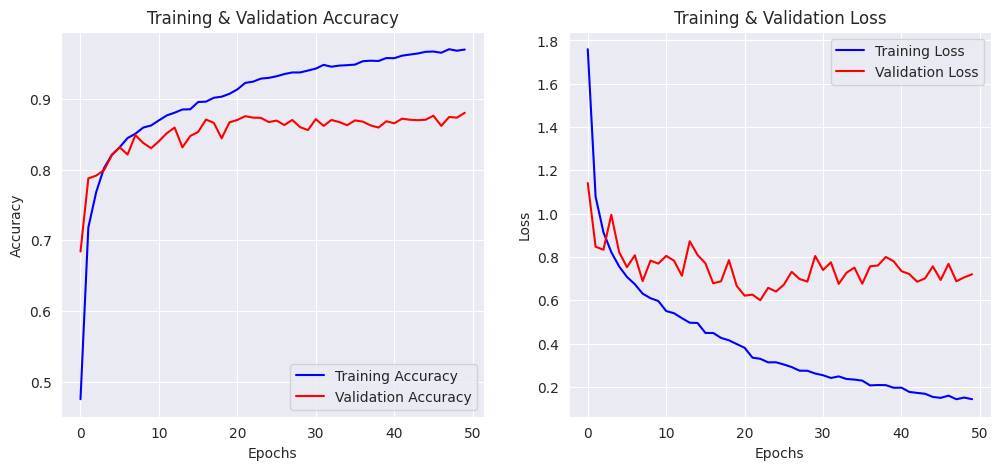

In [31]:

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()



105/105 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step


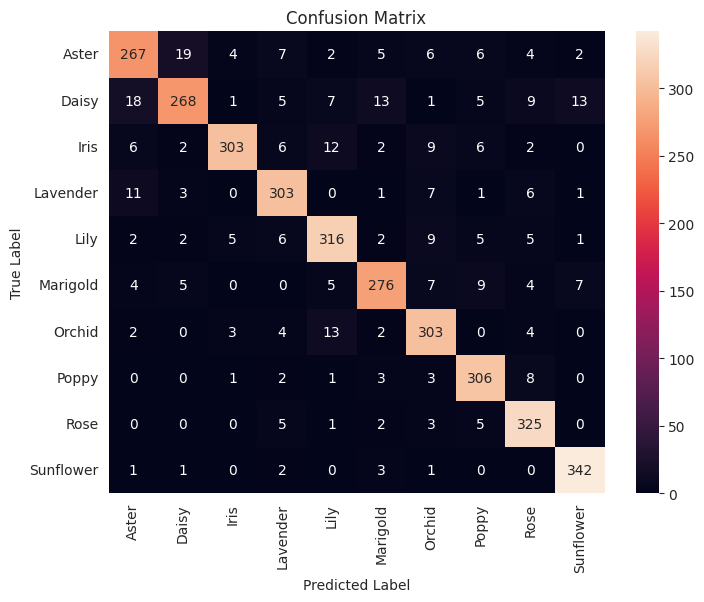


**Classification Report:**
              precision    recall  f1-score   support

       Aster       0.86      0.83      0.84       322
       Daisy       0.89      0.79      0.84       340
        Iris       0.96      0.87      0.91       348
    Lavender       0.89      0.91      0.90       333
        Lily       0.89      0.90      0.89       353
    Marigold       0.89      0.87      0.88       317
      Orchid       0.87      0.92      0.89       331
       Poppy       0.89      0.94      0.92       324
        Rose       0.89      0.95      0.92       341
   Sunflower       0.93      0.98      0.96       350

    accuracy                           0.90      3359
   macro avg       0.90      0.90      0.89      3359
weighted avg       0.90      0.90      0.90      3359



In [32]:

# Prediksi pada test set
Y_pred = model.predict(test_generator)
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Ambil label asli
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  # Nama kelas

# Buat Confusion Matrix
conf_matrix = confusion_matrix(true_classes, Y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print Laporan Klasifikasi
print("\n**Classification Report:**")
print(classification_report(true_classes, Y_pred_classes, target_names=class_labels))


**Evaluasi Model**

- Kinerja Model:
  - Akurasi: 90% (cukup tinggi)
  - Kelas terbaik: Sunflower, Rose, Poppy
  - Kelas sulit: Aster, Daisy (sering tertukar)
  - Overfitting ringan: Loss validasi fluktuatif

## Konversi Model

In [45]:
# Simpan model ke format SavedModel
save_path = 'saved_model/'
os.makedirs(save_path, exist_ok=True)

# Simpan model dalam format SavedModel
tf.saved_model.save(model, save_path)

# Menampilkan lokasi folder tempat model disimpan
print(f'Model SavedModel berhasil disimpan di: {os.path.abspath(save_path)}')


Model SavedModel berhasil disimpan di: /content/saved_model


In [58]:
# Simpan model ke format tflite
tflite_target_dir = "tflite/"
os.makedirs(tflite_target_dir, exist_ok=True)
tflite_model_path = os.path.join(tflite_target_dir, "model.tflite")

# Mengonversi model SavedModel ke format TFLite
converter = tf.lite.TFLiteConverter.from_saved_model(save_path)
tflite_model = converter.convert()

# Menyimpan model TFLite ke dalam file
with tf.io.gfile.GFile(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

print('Model TFLite berhasil disimpan di:', tflite_model_path)


Model TFLite berhasil disimpan di: tflite/model.tflite


In [55]:
# Simpan model ke format tfjs
tfjs_target_dir = "tfjs_model"
os.makedirs(tfjs_target_dir, exist_ok=True)

# Konversi model SavedModel ke format TensorFlow.js
tfjs.converters.convert_tf_saved_model(save_path, tfjs_target_dir)


# Menampilkan lokasi folder tempat model disimpan
print(f'Model TF.js berhasil disimpan di: {os.path.abspath(tfjs_target_dir)}')

Model TF.js berhasil disimpan di: /content/tfjs_model


In [63]:
# Kompres folder menjadi zip
shutil.make_archive('/content/tflite', 'zip', '/content/tflite')
shutil.make_archive('/content/saved_model', 'zip', '/content/saved_model')
shutil.make_archive('/content/tfjs_model', 'zip', '/content/tfjs_model')

# Mendownload model
files.download('/content/tflite.zip')
files.download('/content/saved_model.zip')
files.download('/content/tfjs_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)

Saving 62de3dc731bfa.jpg to 62de3dc731bfa (2).jpg
Kelas yang diprediksi: 1 -> Daisy


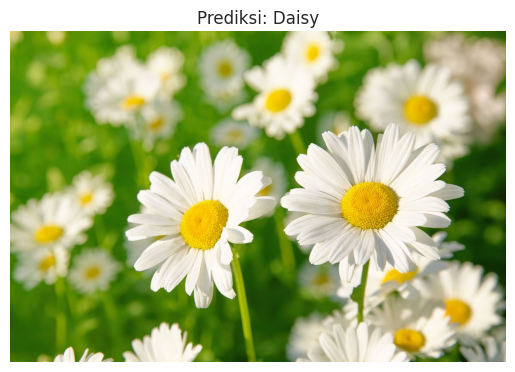

In [74]:
# User mengupload file gambar
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Tentukan path ke model SavedModel
saved_model_path = '/content/saved_model'
# Memuat model SavedModel
model = tf.saved_model.load(saved_model_path)
# Mengakses signature untuk inference
infer = model.signatures["serving_default"]

# Mapping indeks ke label nama bunga
label_map = {
    0: "Aster",
    1: "Daisy",
    2: "Iris",
    3: "Lavender",
    4: "Lily",
    5: "Marigold",
    6: "Orchid",
    7: "Poppy",
    8: "Rose",
    9: "Sunflower"
}

# Fungsi memuat dan mempersiapkan gambar untuk inference
def prepare_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension
    img_array = img_array / 255.0  # Normalisasi gambar jika model dilatih dengan normalisasi
    return img_array

# Gambar yang telah diproses
img_array = prepare_image(image_path)

# Inference
input_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
predictions = infer(input_tensor)

# Ambil output prediksi
output_name = list(predictions.keys())[0]
output_data = predictions[output_name]

# Ambil indeks dengan probabilitas tertinggi
predicted_class = np.argmax(output_data)

# Cocokkan dengan nama bunga
predicted_label = label_map.get(predicted_class, "Unknown")

# Tampilkan hasil prediksi
print(f"Kelas yang diprediksi: {predicted_class} -> {predicted_label}")

# Tampilkan gambar yang diprediksi
img = image.load_img(image_path)
plt.imshow(img)
plt.axis("off")
plt.title(f"Prediksi: {predicted_label}")
plt.show()